98. Validate Binary Search Tree

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

The left subtree of a node contains only nodes with keys strictly less than the node's key.
The right subtree of a node contains only nodes with keys strictly greater than the node's key.
Both the left and right subtrees must also be binary search trees.
 

Example 1:

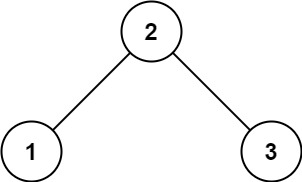

Input: root = [2,1,3]
Output: true
Example 2:

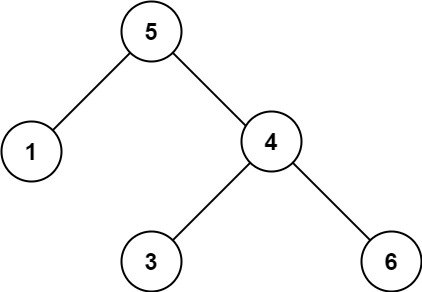

Input: root = [5,1,4,null,null,3,6]
Output: false
Explanation: The root node's value is 5 but its right child's value is 4.
 

Constraints:

The number of nodes in the tree is in the range [1, 104].
-231 <= Node.val <= 231 - 1

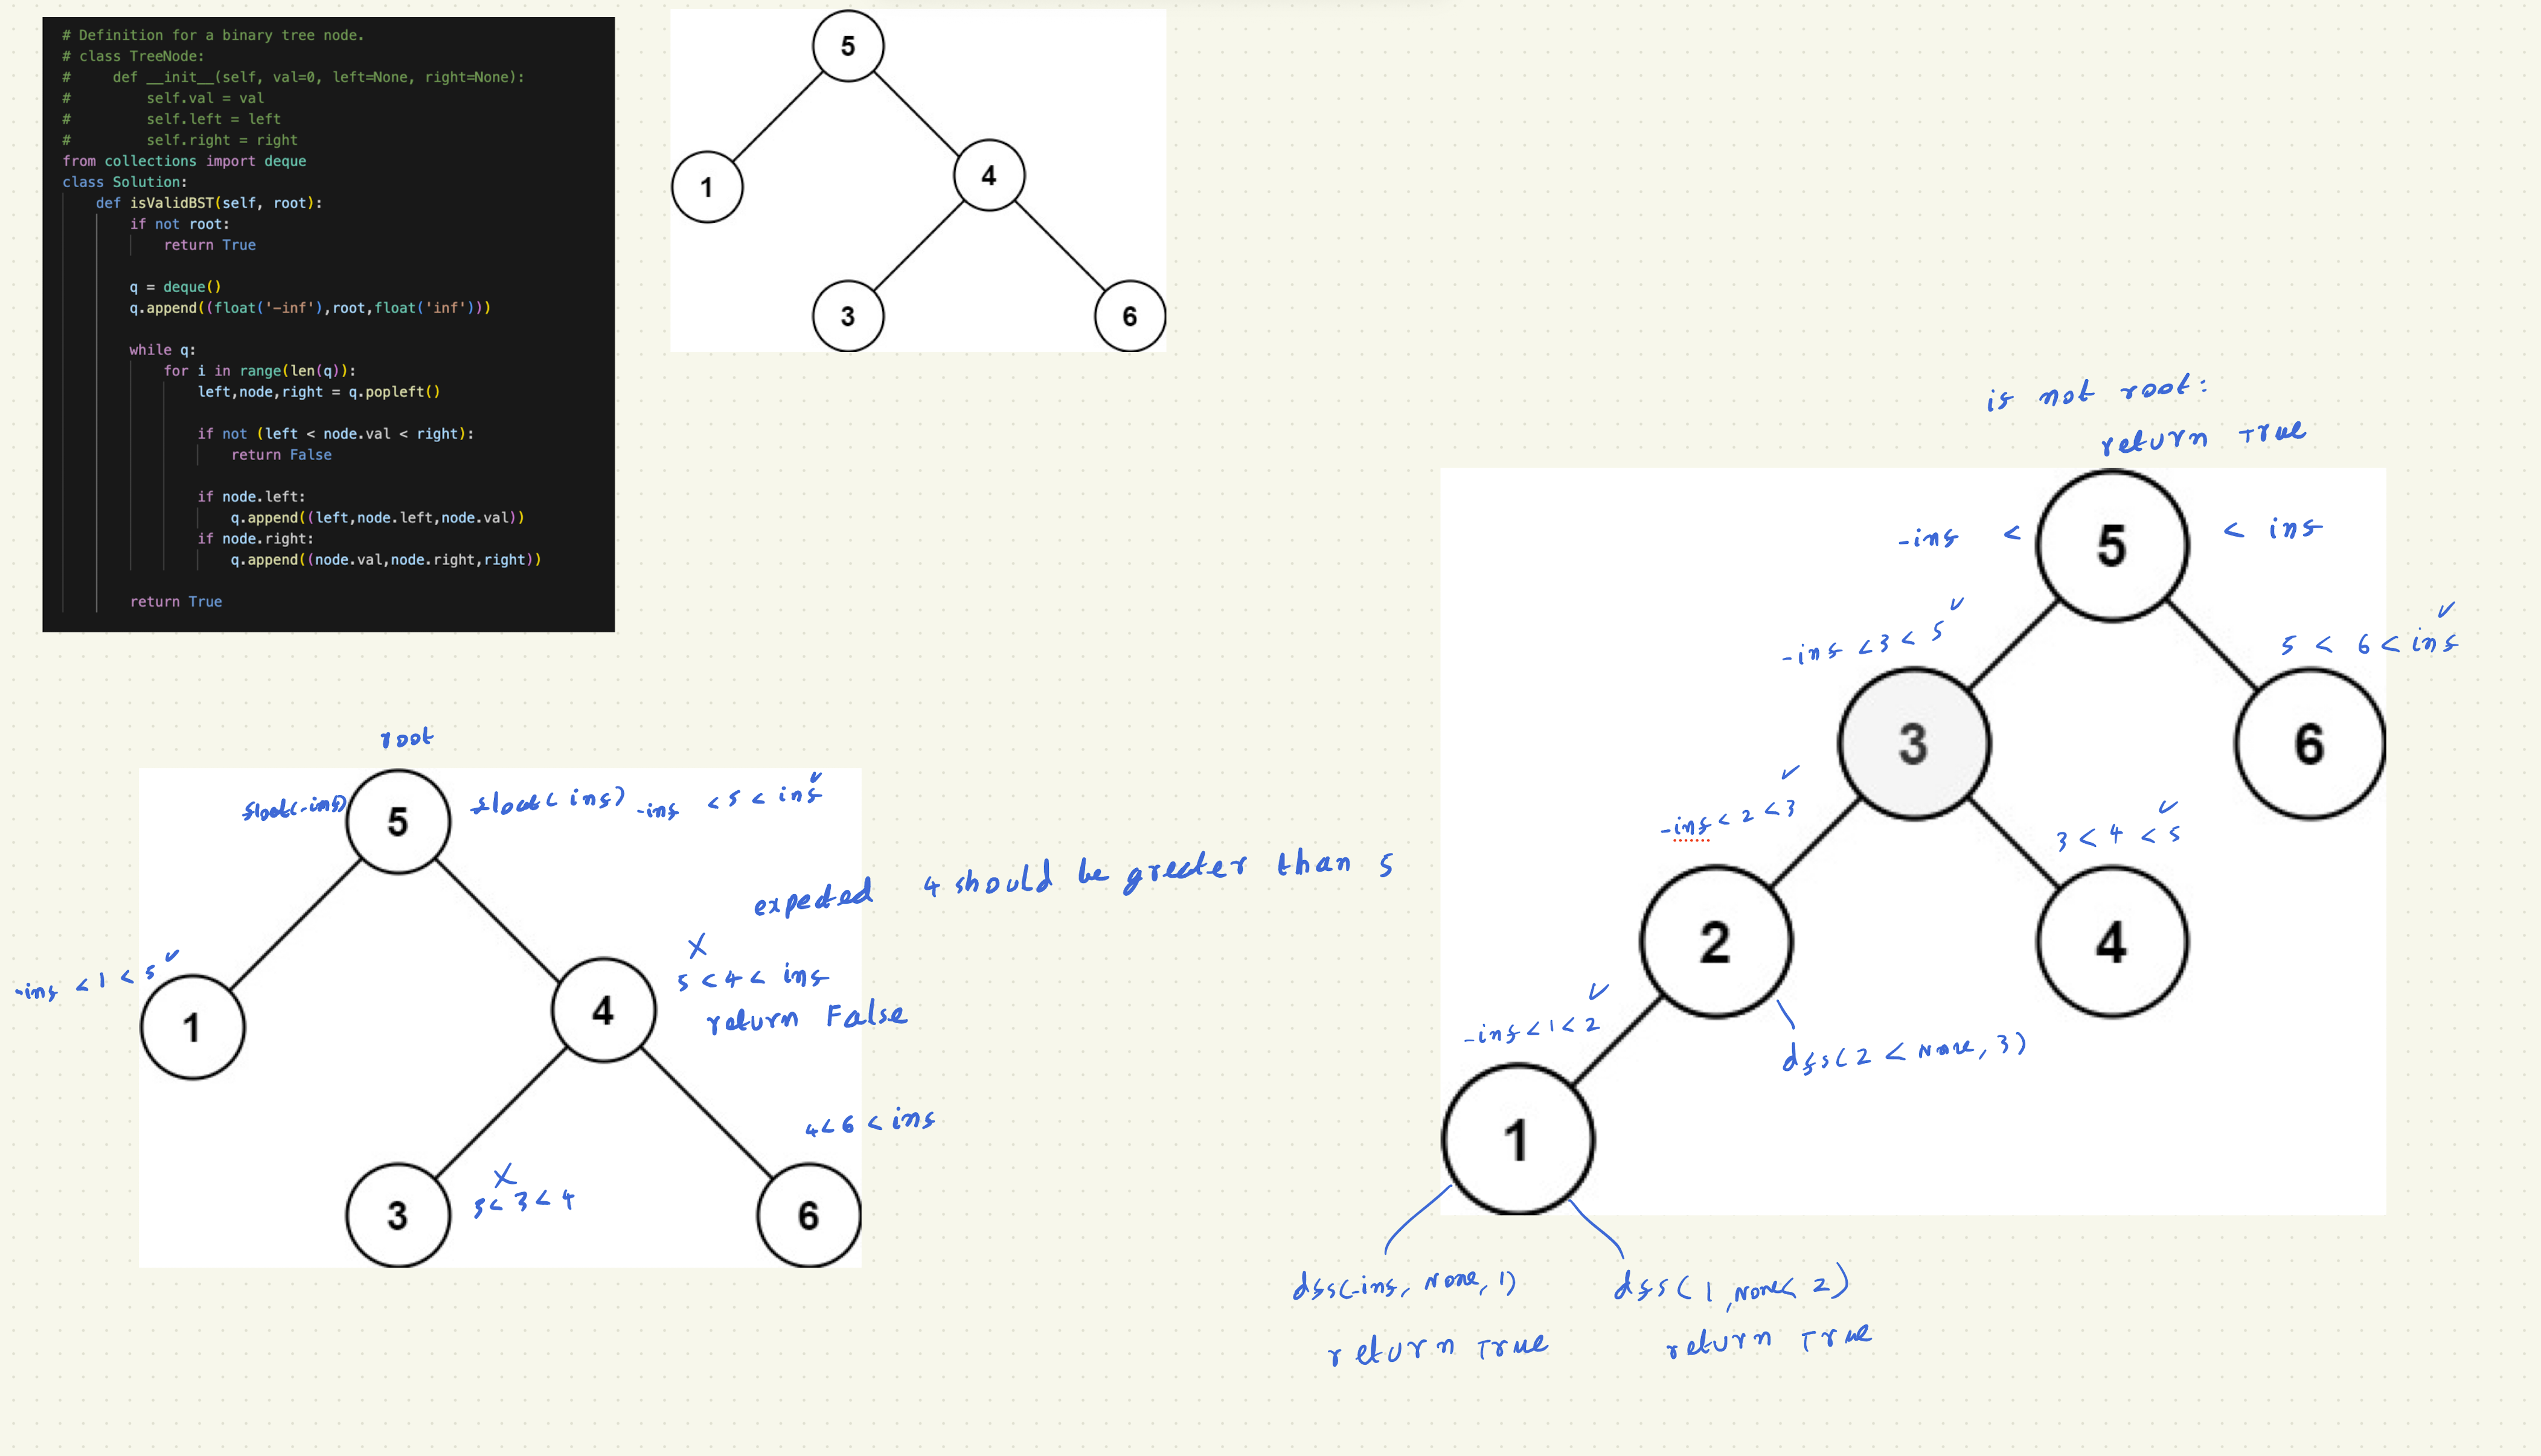

Intuition:

for each node we need to check if the node's value is greater than left child value and less than right child's value
we will recursively chek if the travesing root value is withing the boundary value

        def dfs(left,root,right):
            if not root: # its fine to have None as root value (incase of tail and head is dummy), return true
                return True

            if not (left < root.val < right): # if the condition of curren root's left is lesser than parrent (prev connected node) val and current root's right value is greater than (prev connected node) then the BST rule is not satisfied, return False
                return False

            return dfs(left,root.left,root.val) and dfs(root.val,root.right,right) # continue checking recursively 

        return dfs(float('-inf'),root,float('inf'))

for the root value we will check if its withing -inf and inf, because we cant check for its parrent node. for the nodes coming after we can check if the is < or > than prev node


In [1]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque
class Solution:
    def isValidBST(self, root):
        if not root:
            return True

        q = deque()
        q.append((float('-inf'),root,float('inf')))

        while q:
            for i in range(len(q)):
                left,node,right = q.popleft()

                if not (left < node.val < right):
                    return False
                
                if node.left:
                    q.append((left,node.left,node.val))
                if node.right:
                    q.append((node.val,node.right,right))

        return True


In [2]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root) -> bool:

        def dfs(left,root,right):
            if not root:
                return True

            if not (left < root.val < right):
                return False

            return dfs(left,root.left,root.val) and dfs(root.val,root.right,right)

        return dfs(float('-inf'),root,float('inf'))


In [2]:
"""
brute force
first perform inorder traversal for the given root node and add the vals to res array

next iterate through the array and check if all previous values are less than current values and the values are not the same

"""
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root) -> bool:
        if not root:
            return False
        res = []
        def dfs(root):
            if not root:
                return

            dfs(root.left)
            res.append(root.val)
            dfs(root.right)
        dfs(root)
        
        for i in range(1,len(res)):
            if not res[i] > res[i-1]:
                return False
        return True